# Problem Statement

Given the following data set, can you plot a chart that shows the percent of revenue by marketing source?

You can assume that purchase_value is revenue in this case, and you'll have to calculate the percent of revenue by source prior to plotting.

The solution for premium users will be provided using python.

## Bring in the Data

In [1]:
# data wrangling and analysis
import pandas as pd
# plotting functions
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Mathematical Computation
import numpy as np

In [2]:
df = pd.read_csv('Sales data - Sales data.csv')

In [3]:
# Take a look at the data
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08


## Analyze the Percentages

In [4]:
# Calculate the total revenue
total_revenue = np.sum(df['purchase_value'])
print(f'Total Revenue: {total_revenue}')

Total Revenue: 5581378


In [5]:
# Create a list of the total revenue per marketing channel
marketing_channels = df['source'].unique()

In [6]:
channel_revenues = list()
for channel in marketing_channels:
    # select just the sales made in that channel
    channel_purchases = df.loc[df['source'] == channel, ['purchase_value']]
    # sum the revenue
    channel_revenue = np.sum(channel_purchases)
    # add to the overall list as a percentages
    channel_revenues.append(channel_revenue / total_revenue)

## Visualize the Percentages

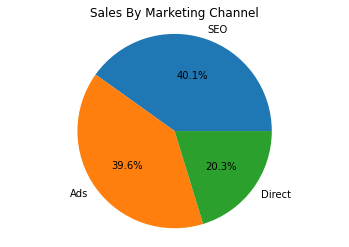

In [7]:
# resize the channel revenues
channel_rev = np.array(channel_revenues).reshape(-1,)

fig, ax = plt.subplots()

ax.pie(channel_rev, labels=marketing_channels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sales By Marketing Channel")
plt.show()